# Biological Computing in Python II

```{epigraph}
...some things in life are bad. They can really make you mad. Other things just make you swear and curse. When you're chewing on life's gristle, don't grumble; give a whistle, and this'll help things turn out for the best. And... always look on the bright side of life... 

-- Monty Python

```

In this chapter, we will build on the [first Python Chapter](05-Python_I.ipynb), covering some more advanced topics.

## Numerical computing in Python

Python is a good choice for numerical computing (recall [this comparison](05-Python_I:Why-python)). Using the right packages, you can do some serious number crunching in Python.

We will use the `numpy` and `scipy` packages. The latter offers a data structure called numpy array that is suitable for efficient computing, along with basic operations on these arrays. 

On the other hand, scipy is proper numerical computing package (which *uses* numpy arrays) that can do a lot of things, including:

* Linear algebra (matrix and vector operations) using `scipy.linalg`
* Dealing with sparse matrix problems using `scipy.sparse`
* Numerical integration (including solving of Ordinary Differential Equations (ODEs)) using `scipy.integrate`
* Random number generation and using statistical functions and transformations using `scipy.stats`
* Optimization using `scipy.optimize`
* Fourier transforms using `scipy.fft`
* Signal Processing using `scipy.signal`

We will learn more about scipy further below. First, let's start with `numpy`.

### Numpy

Numpy provides the `numpy array` data structure, along with methods for for data creation, manipulations and basic numerical calculations. Numpy arrays are similar in some respects to Python lists, but are homogeneous in type (the default is float), allow efficient (fast) manipulations, and are more naturally multidimensional (e.g., you can store multiple matrices in one array). 

```{note}
numpy arrays are analogous to the [R `matrix`](R-matrices) data structure.
```

Let's start by importing numpy:

In [2]:
import numpy as np

In [141]:
a = np.array(range(5)) # a one-dimensional array
a

array([0, 1, 2, 3, 4])

In [142]:
print(type(a))

<class 'numpy.ndarray'>


In [143]:
print(type(a[0]))

<class 'numpy.int64'>


Thus the last two outputs tell you that firstly, that numpy arrays belong to a data structure type (and a class) called `numpy.ndarray`, and secondly, that at position `0` (remember, Python indexing starts at 0) it holds an [64 bit integer](https://en.wikipedia.org/wiki/9,223,372,036,854,775,807). All elements in `a` are of type `int` because that is what `range()` returns (try `?range`).

---

:::{figure-md} Python-numpy-array 

<img src="./graphics/numpyarray.png" alt="Python numpy array" width="700px">

**A graphical depiction of numpy/numpy arrays.** These can have multiple dimensions (even greater than 3). <br>
(Source: [http://pages.physics.cornell.edu/~myers/teaching/ComputationalMethods/python/arrays.html](http://pages.physics.cornell.edu/~myers/teaching/ComputationalMethods/python/arrays.html))

::: 

---

You can also specify the data type of the array:

In [144]:
a = np.array(range(5), float)
a

array([0., 1., 2., 3., 4.])

In [145]:
a.dtype # Check type 

dtype('float64')

You can also get a 1-D arrays as follows:

In [146]:
x = np.arange(5)
x

array([0, 1, 2, 3, 4])

In [147]:
x = np.arange(5.) #directly specify float using decimal
x

array([0., 1., 2., 3., 4.])

As with other Python variables (e.g., created as a list or a dictionary), you can apply methods to variables created as numpy arrays. For example, type `x.` and hit TAB to see all methods you can apply to`x`. To see dimensions of `x`:

In [148]:
x.shape

(5,)

```{tip}
Remember, you can type `:?x.methodname` to get info on a particular method (command). For example, try `?x.shape`.
```

You can also convert to and from Python lists (recall [list comprehensions](Python-Comprehensions) from the [Python I chapter](./05-Python_I.ipynb)):

In [149]:
b = np.array([i for i in range(10) if i % 2 == 1]) #odd numbers between 1 and 10 
b

array([1, 3, 5, 7, 9])

In [150]:
c = b.tolist() #convert back to list
c

[1, 3, 5, 7, 9]

To make a matrix, you need a 2-D numpy array:

In [151]:
mat = np.array([[0, 1], [2, 3]])
mat

array([[0, 1],
       [2, 3]])

In [152]:
mat.shape

(2, 2)

### Indexing and accessing arrays

As with other Python data objects such as lists, numpy array elements can be accessed using square brackets (`[ ]`) with the usual `[row,column]` reference. Indexing of numpy arrays works like that for other data structures, with index values starting at 0. So, you can obtain all the elements of a particular row as:

In [153]:
mat[1] # accessing whole 2nd row, remember indexing starts at  0

array([2, 3])

In [154]:
mat[:,1] #accessing whole second column  

array([1, 3])

And accessing particular elements:

In [155]:
mat[0,0] # 1st row, 1st column element

0

In [156]:
mat[1,0] # 2nd row, 1st column element

2

Note that (like all other programming languages) row index always comes before column index. That is, `mat[1]` is always going to mean "whole second row", and `mat[1,1]` means 1st row and 1st column element. Therefore, to access the whole second column, you need:

In [157]:
mat[:,0] #accessing whole first column  

array([0, 2])

Python indexing also accepts negative values for going back to the start
from the end of an array:

In [158]:
mat[0,1]

1

In [159]:
mat[0,-1]

1

In [160]:
mat[-1,0]

2

In [161]:
mat[0,-2]

0

Very interesting, but rather useless for this simple matrix!

### Manipulating arrays

Manipulating numpy arrays is pretty straightforward. 

```{note}
**Why numpy arrays are computationally efficient:**  The data associated with a numpy array object (its metadata  &ndash; number of dimensions, shape, data type, etc &ndash; as well as the actual data) are stored in a homogeneous and contiguous block of memory (a "data buffer"), at a particular address in the system's RAM (Random Access Memory). This makes numpy arrays more efficient than a pure Python data structures like lists whose data are scattered across the system memory.
```

#### Replacing, adding or deleting elements

Let's look at how you can replace, add, or delete an array element (a single entry, or whole row(s) or whole column(s)):

In [162]:
mat[0,0] = -1 #replace a single element
mat

array([[-1,  1],
       [ 2,  3]])

In [163]:
mat[:,0] = [12,12] #replace whole column
mat

array([[12,  1],
       [12,  3]])

In [164]:
np.append(mat, [[12,12]], axis = 0) #append row, note axis specification

array([[12,  1],
       [12,  3],
       [12, 12]])

In [165]:
np.append(mat, [[12],[12]], axis = 1) #append column

array([[12,  1, 12],
       [12,  3, 12]])

In [166]:
newRow = [[12,12]] #create new row

In [167]:
mat = np.append(mat, newRow, axis = 0) #append that existing row
mat

array([[12,  1],
       [12,  3],
       [12, 12]])

In [168]:
np.delete(mat, 2, 0) #Delete 3rd row

array([[12,  1],
       [12,  3]])

And concatenation:

In [169]:
mat = np.array([[0, 1], [2, 3]])
mat0 = np.array([[0, 10], [-1, 3]])
np.concatenate((mat, mat0), axis = 0)

array([[ 0,  1],
       [ 2,  3],
       [ 0, 10],
       [-1,  3]])

#### Flattening or reshaping arrays

You can also "flatten" or "melt" arrays, that is, change array dimensions (e.g., from a matrix to a vector):

In [170]:
mat.ravel()

array([0, 1, 2, 3])

In [171]:
mat.reshape((4,1))

array([[0],
       [1],
       [2],
       [3]])

This is different from ravel: check the documentation by using `?np.reshape`.

In [172]:
mat.reshape((1,4))

array([[0, 1, 2, 3]])

```{note}
You might have noticed that flattening and reshaping is "row-priority": elements of the vector are allocated to a matrix row-wise, and vice versa(e.g., with `ravel` unraveling also happens row by row).
```

In [173]:
mat.reshape((3, 1))

ValueError: cannot reshape array of size 4 into shape (3,1)

This gives an error because total elements must remain the same! 

This is a bit different than how [`R` behaves](R-Recycling), where you won't get an error (R "recycles" data) (which can be dangerous!)

### Pre-allocating arrays

As in other computer languages, it is usually more efficient to preallocate an array rather than append / insert / concatenate additional elements, rows, or columns. *Why*? &ndash; because you might run out of contiguous space in the specific system memory (RAM) address where the current array is stored. Preallocation allocates all the RAM memory you need in one call, while resizing the array (through `append`, `insert`, `concatenate`, `resize`, etc.) may require copying the array to a larger block of memory, slowing things down, and significantly so if the matrix/array is very large.

For example, if you know the size of your matrix or array, you can initialize it with ones or zeros:

In [174]:
np.ones((4,2)) #(4,2) are the (row,col) array dimensions

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.]])

In [175]:
np.zeros((4,2)) # or zeros

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [176]:
m = np.identity(4) #create an identity matrix
m

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [177]:
m.fill(16) #fill the matrix with 16
m

array([[16., 16., 16., 16.],
       [16., 16., 16., 16.],
       [16., 16., 16., 16.],
       [16., 16., 16., 16.]])

### `numpy` matrices

Scipy/Numpy also has a `matrix` data structure class. Numpy matrices are strictly 2-dimensional, while numpy arrays are N-dimensional. Matrix objects are a subclass of numpy arrays, so they inherit all the attributes and methods of numpy arrays (ndarrays).

The main advantage of scipy matrices is that they provide a convenient notation for matrix multiplication: for example, if `a` and `b` are matrices, then `a * b` is their matrix product.

#### Matrix-vector operations

Now let's perform some common matrix-vector operations on arrays (you can also try the same using matrices instead of arrays):

In [178]:
mm = np.arange(16)
mm = mm.reshape(4,4) #Convert to matrix
mm

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [179]:
mm.transpose()

array([[ 0,  4,  8, 12],
       [ 1,  5,  9, 13],
       [ 2,  6, 10, 14],
       [ 3,  7, 11, 15]])

In [180]:
mm + mm.transpose()

array([[ 0,  5, 10, 15],
       [ 5, 10, 15, 20],
       [10, 15, 20, 25],
       [15, 20, 25, 30]])

In [181]:
mm - mm.transpose()

array([[ 0, -3, -6, -9],
       [ 3,  0, -3, -6],
       [ 6,  3,  0, -3],
       [ 9,  6,  3,  0]])

In [182]:
mm * mm.transpose() # Note that this is element-wise multiplication

array([[  0,   4,  16,  36],
       [  4,  25,  54,  91],
       [ 16,  54, 100, 154],
       [ 36,  91, 154, 225]])

In [183]:
mm // mm.transpose()

<ipython-input-183-2d8eab61478f>:1: RuntimeWarning: divide by zero encountered in floor_divide
  mm // mm.transpose()


array([[0, 0, 0, 0],
       [4, 1, 0, 0],
       [4, 1, 1, 0],
       [4, 1, 1, 1]])

Note that we used integer division `//`. Note also the warning you get (because of zero division). So let's avoid the divide by zero:

In [184]:
mm // (mm + 1).transpose()

array([[0, 0, 0, 0],
       [2, 0, 0, 0],
       [2, 1, 0, 0],
       [3, 1, 1, 0]])

In [185]:
mm * np.pi

array([[ 0.        ,  3.14159265,  6.28318531,  9.42477796],
       [12.56637061, 15.70796327, 18.84955592, 21.99114858],
       [25.13274123, 28.27433388, 31.41592654, 34.55751919],
       [37.69911184, 40.8407045 , 43.98229715, 47.1238898 ]])

In [186]:
mm.dot(mm) # No this is matric multiplication, or the dot product

array([[ 56,  62,  68,  74],
       [152, 174, 196, 218],
       [248, 286, 324, 362],
       [344, 398, 452, 506]])

There is also a numpy matrix class:

In [187]:
mm = np.matrix(mm) # convert to scipy/numpy matrix class
mm

matrix([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]])

In [188]:
print(type(mm))

<class 'numpy.matrix'>


This data structure makes matrix multiplication syntactically easier:

In [189]:
mm * mm # instead of mm.dot(mm)

matrix([[ 56,  62,  68,  74],
        [152, 174, 196, 218],
        [248, 286, 324, 362],
        [344, 398, 452, 506]])

```{warning}
However, it is not recommended that you use the numpy matrix class because it may be removed [in the future](https://numpy.org/doc/stable/reference/generated/numpy.matrix.html).
```

```{tip}
You can do a lot more with matrices and vectors by importing the `linalg` sub-package from scipy: `scipy.linalg`.
```

### The `scipy` package

Now let's move on to `scipy`. 

```{note}
**scipy vs numpy**: It's a bit confusing. Please have a look at [this](https://www.scipy.org/scipylib/faq.html#what-is-the-difference-between-numpy-and-scipy) and [this](https://docs.scipy.org/doc/scipy/reference/release.1.4.0.html#scipy-deprecations). Basically, there is some overlap between what these two packages can do, and this redundancy will eventually be phased out completely. The recommended approach is to use numpy for creating and manipulating data and scipy for more complex numerical operations.
```

We will look at two particularly useful `scipy` sub-packages here: `scipy.stats` and `scipy.integrate`. 

(Python-scipy-stats)=
#### Scipy stats

Let's take a quick spin in `scipy.stats`. 

*Why not use `R` for stats?* — because often you might just need to calculate some summary stats of your simulation results within Python, or you simulations may require the generation of random numbers.

First, import scipy:

In [190]:
import scipy as sc

Or you can use `from scipy import stats`. 

Let's generate 10 samples from the normal distribution ($\mathcal{N}(\mu,\,\sigma^{2})$):

In [191]:
sc.stats.norm.rvs(size = 10)

array([ 0.40545341,  0.28909194,  1.32115819, -1.54690555, -0.20264632,
       -0.65596934,  0.19342138,  0.55343891,  1.31815155, -0.46930528])

By default, [as in R](R-random-numbers), these are numbers from the *standard* normal distribution ($\mathcal{N}(0,\,1)$).

```{tip}
**Continuing on the numpy vs scipy theme**: Both scipy and numpy can generate random numbers (e.g., `np.random.normal(size=10)` would work equally well above). In fact, scipy uses the `numpy.random` package under the hood for drawing random numbers. You may choose to use either, but for sanity, its probably a good idea to just stick with `scipy.stats` for all your stats number crunching.
```

Also, as you learned [in R](R-random-numbers), you can "seed" random numbers to get the same sequence every time (important for reproducibility &ndash; when you need to know what specific random numbers were input into a particular program routine or algorithm).

In [192]:
np.random.seed(1234)
sc.stats.norm.rvs(size = 10)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])

But setting a *global* random number state is not always needed or in some many cases, recommended, because using something like `np.random.seed(1234)` will set the seed for all following instances where a random number is generated. In many scenarios a more robust way is to use the `random_state` argument for each specific generation of a set of random numbers:

In [193]:
sc.stats.norm.rvs(size=5, random_state=1234)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873])

We will not move on from `scipy.stats`. Before we do so, here's an example of generating random integers between 0 and 10:

In [194]:
sc.stats.randint.rvs(0, 10, size = 7)

array([5, 0, 9, 6, 2, 0, 5])

And again with a random seed:

In [195]:
sc.stats.randint.rvs(0, 10, size = 7, random_state=1234)

array([3, 6, 5, 4, 8, 9, 1])

In [196]:
sc.stats.randint.rvs(0, 10, size = 7, random_state=3445) # a different seed

array([8, 1, 9, 6, 8, 6, 0])

#### Numerical integration using  `scipy`

OK, on to to and `scipy.integrate`. 

Numerical integration is the approximate computation of an integral using numerical techniques. You need numerical integration whenever you have a complicated function that cannot be integrated analytically using anti-derivatives. For example, calculating the area under a curve is a particularly useful application. Another one is solving ordinary differential equations (ODEs), commonly used for modelling biological systems.

In [197]:
import scipy.integrate as integrate

##### Area under a curve

Let's calculate the area under an arbitrary curve.

In [198]:
y = np.array([5, 20, 18, 19, 18, 7, 4]) # The y values; can also use a python list here

Let's visualize the curve. We can use the `matplotlib` package for this: 

In [199]:
import matplotlib.pylab as p

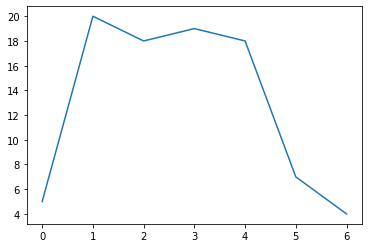

In [200]:
p.plot(y)

Now compute the area using the [composite trapezoidal rule](https://en.wikipedia.org/wiki/Trapezoidal_rule):

In [201]:
area = integrate.trapz(y, dx = 2)
print("area =", area)

area = 173.0


The argument `dx` defines the spacing between points of the curve (the x-axis values). The default is 1 (don't forget to check out the documentation: `?integrate.trapz`). Changing this will change the area, of course:

In [202]:
area = integrate.trapz(y, dx = 1)
print("area =", area)

area = 86.5


In [203]:
area = integrate.trapz(y, dx = 3)
print("area =", area)

area = 259.5


Now, the same, using [Simpson's rule](https://en.wikipedia.org/wiki/Simpson%27s_rule):

In [204]:
area = integrate.simps(y, dx = 2)
print("area =", area)

area = 176.66666666666663


In [205]:
area = integrate.simps(y, dx = 1)
print("area =", area)

area = 88.33333333333331


In [206]:
area = integrate.simps(y, dx = 3)
print("area =", area)

area = 265.0


##### The Lotka-Volterra model

Now let's try numerical integration in Python for solving a classical model in biology — the Lotka-Volterra (LV) model for a predator-prey system in two-dimensional space (e.g., on land). The LV model is: 

\begin{align}
    \frac{dR}{dt} &= r R - a C R  \nonumber \\
    \frac{dC}{dt} &= - z C + e a C R
\end{align}

where, 

* $C$ and $R$ are consumer (e.g., predator) and resource (e.g., prey) population abundances (either number $\times$ area$^{-1}$ ).
* $r$ is the intrinsic (per-capita) growth rate of the resource population (time$^{-1}$).
* $a$ is per-capita "search rate" for the resource ($\text{area}\times \text{time}^{-1}$)  multiplied by its attack success probability, which determines the encounter and consumption rate of the consumer on the resource.
* $z$ is mortality rate ($\text{time}^{-1}$) and $e$ is the consumer's efficiency (a fraction) in converting resource to consumer biomass.

We have already imported scipy above (`import scipy as sc`) so we can proceed to solve the LV model using numerical integration. 

First, import `scipy`'s `integrate` submodule:

Now define a function that returns the growth rate of consumer and resource population at any given time step.

In [207]:
def dCR_dt(pops, t=0):

    R = pops[0]
    C = pops[1]
    dRdt = r * R - a * R * C 
    dCdt = -z * C + e * a * R * C
    
    return np.array([dRdt, dCdt])

In [208]:
type(dCR_dt)

function

So `dCR_dt` has been stored as a function object in the current Python session, all ready to go. 

Now assign some parameter values:

In [209]:
r = 1.
a = 0.1 
z = 1.5
e = 0.75

Define the time vector; let's integrate from time point 0 to 15, using 1000 sub-divisions of time:

In [210]:
t = np.linspace(0, 15, 1000)

Note that the units of time are arbitrary here. 

Set the initial conditions for the two populations (10 resources and 5 consumers per unit area), and convert the two into an array (because our `dCR_dt` function take an array as input). 

In [211]:
R0 = 10
C0 = 5 
RC0 = np.array([R0, C0])

Now numerically integrate this system forward from those starting conditions: 

In [212]:
pops, infodict = integrate.odeint(dCR_dt, RC0, t, full_output=True)

In [213]:
pops

array([[10.        ,  5.        ],
       [10.07578091,  4.94421976],
       [10.1529783 ,  4.88948321],
       ...,
       [ 9.99869712, 17.56204194],
       [ 9.8872779 , 17.3642589 ],
       [ 9.78000354, 17.16658946]])

So `pops` contains the result (the population trajectories).  Also check what's in infodict (it's a  dictionary with additional information)

In [214]:
type(infodict)

dict

In [215]:
infodict.keys()

dict_keys(['hu', 'tcur', 'tolsf', 'tsw', 'nst', 'nfe', 'nje', 'nqu', 'imxer', 'lenrw', 'leniw', 'mused', 'message'])

Check what the `infodict` output is by reading the help documentation with `?scipy.integrate.odeint`. For example, you can return a message to screen about whether the integration was successful: 

In [216]:
infodict['message']

'Integration successful.'

So it worked, great! 

But we would like to visualize the results. Let's do it using the `matplotlib` package. 

Again, to visualize the results of your numerical simulations in Python (or for data exploration/analyses), you can use `matplotlib`, which uses Matlab like plotting syntax.

First import the package:

In [217]:
import matplotlib.pylab as p

Now open an empty figure object (analogous to an R graphics object).

In [218]:
f1 = p.figure()

<Figure size 432x288 with 0 Axes>

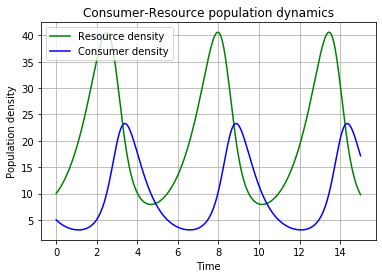

In [219]:
p.plot(t, pops[:,0], 'g-', label='Resource density') # Plot
p.plot(t, pops[:,1]  , 'b-', label='Consumer density')
p.grid()
p.legend(loc='best')
p.xlabel('Time')
p.ylabel('Population density')
p.title('Consumer-Resource population dynamics')
p.show()# To display the figure

Finally, save the figure as a pdf:

In [220]:
f1.savefig('../results/LV_model.pdf') #Save figure

```{tip} 
You can use many other graphics output formats in matplotlib; check the documentation of `p.savefig`.
```

### Practicals

1. Create a self-standing script using the above example and save it as `LV1.py` in your code directory. In addition to generating the above figure, it should also generate the following figure: 

---
:::{figure-md} LV-phase-plot


<img src="./graphics/LV_model_CR.png" alt="Lotka-Volterra phase plot" width="400px">

**Generate this figure as part of the `LV1.py` script.** 

:::

---

It should save both figures in pdf to the `results` directory, *without displaying them on screen*.

### The need for speed: profiling code

Donald Knuth says: *Premature optimization is the root of all evil*. 

Indeed, computational speed may not be your initial concern. Also, you should focus on developing clean, reliable, reusable code rather than worrying first about how fast your code runs. However, speed will become an issue when and if your analysis or modeling becomes complex enough (e.g., food web or large network simulations). In that case, knowing which parts of your code take the most time is useful – optimizing those parts may save you lots of time. 

#### Profiling

To find out what is slowing down your code you need to "profile" your code: locate the sections of your code where  speed bottlenecks exist. 

Profiling is easy in `ipython` – simply use the command: 

```python
%run -p your_function_name
```

Let's write an illustrative program (name it `profileme.py`) and run it:

In [221]:
def my_squares(iters):
    out = []
    for i in range(iters):
        out.append(i ** 2)
    return out

def my_join(iters, string):
    out = ''
    for i in range(iters):
        out += string.join(", ")
    return out

def run_my_funcs(x,y):
    print(x,y)
    my_squares(x)
    my_join(x,y)
    return 0

run_my_funcs(10000000,"My string")

10000000 My string


0

Look carefully at what each of these functions does. 

Now run the script with `run -p profileme.py`, and you should see something like: 

```bash
        20000063 function calls (20000062 primitive calls) in 9.026 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    3.335    3.335    3.732    3.732 profileme.py:1(my_squares)
        1    2.698    2.698    5.200    5.200 profileme.py:7(my_join)
 10000001    2.502    0.000    2.502    0.000 {method 'join' of 'str' objects}
 10000008    0.397    0.000    0.397    0.000 {method 'append' of 'list' objects}
        1    0.093    0.093    9.025    9.025 profileme.py:13(run_my_funcs)
[more output]
```
The column headings in the profiling results are:

| Column name | Meaning |
| :- | -  |
| `filename:lineno(function)` | The filename, line number, and function name|
| `ncalls`  | Number of times the function was called |
| `tottime` | Total time spent in the function (excluding time spent in calls to sub-functions of that function)|
| `percall` | `tottime` divided by `ncalls`|
| `cumtime` | Cumulative time spent in the function *and* all its sub-functions|
| `percall` | `cumtime` divided by `ncalls`|

(Please also see the official Python [documentation](https://docs.python.org/3.6/library/profile.html)) 

The difference between `tottime` and `cumtime` columns often holds the most important information about performance. For example, in the above output, `cumtime` is much higher than `tottime` for `my_join` than for `my_squares`. This is because the sub-function (method) `join` is taking an additional 2.502 seconds (due to 10000001 calls), giving a `cumtime` of 2.698 + 2.502 = 5.2 seconds. In comparison, the sub-function (method) `append` is taking an additional 0.397 seconds (due to 10000008 calls), giving a `cumtime` of 3.335 + 0.397 = 3.732 seconds. Note also that the `tottime`s for `join` and `append` include the "overhead" of running their respective loop.

Thus, we can infer that the `my_join` function is hogging most of the time, followed by `my_squares`, and furthermore, that its the string method `join` that is slowing `my_join` down, and list method `append` that is slowing `my_squares` down. In other words, `.join`ing the string, and `.append`ing values to a list repeatedly are both not particularly fast, though the latter is less costly.

Can we do better? *Yes!* 

Let's try this alternative approach to writing the program (save it as `profileme2.py`, and again, run it):

In [222]:
def my_squares(iters):
    out = [i ** 2 for i in range(iters)]
    return out

def my_join(iters, string):
    out = ''
    for i in range(iters):
        out += ", " + string
    return out

def run_my_funcs(x,y):
    print(x,y)
    my_squares(x)
    my_join(x,y)
    return 0

run_my_funcs(10000000,"My string")

10000000 My string


0

We did two things: converted the loop to a list comprehension, and replaced the `.join` with an explicit string concatenation.

Now profile this program (`run -p profileme2.py`), and you should get something like:

```bash
        64 function calls (63 primitive calls) in 4.585 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    2.497    2.497    2.497    2.497 profileme2.py:2(<listcomp>)
        1    1.993    1.993    1.993    1.993 profileme2.py:5(my_join)
        1    0.094    0.094    4.584    4.584 profileme2.py:11(run_my_funcs)
[more output]
```

Woo hoo! So we about halved the time! Not quite enough to grab a pint, but ah well...
 
$\star$ Another approach would be to preallocate a `numpy` array instead of using a list for `my_squares` - *Try it*

You can also modify how the profiling results are displayed, and more, by using flags. For example, `-s` allows sorting the report by a particular column,  `-l`  limits the number of lines displayed or filters the results by function name, and `-T` saves the report in a text file.

For example, try 

```python
run -p -s cumtime profileme2.py
```
This will do the profiling and display the results sorted by `cumtime`.   

#### Profiling without ipython 

You may want to execute the code that you need to profile from outside IPython (e.g., using a bash script). In this case, we you can use the module cProfile (ipython actually uses this when you do `%run -p`). 

here is an example (run from bash): 

```bash
python3 -m cProfile profileme2.py
```

Or, 

```bash
python3 -m cProfile -o profires myscript.py
```
Here the results are stored in a file called `profires`, which can be read using the `pstats` module. Read the documentation of `cProfile` and `pstats` modules; there are many analyses you can perform on such exported  profiling reports.

#### Quick profiling with `timeit`

Additionally, you can use the `timeit` module if you want to figure out what the best way to do something specific as part of a larger program (say a particular command or a loop) might be.

Type and run the following code in a python script called `timeitme.py`:

```python
##############################################################################
# loops vs. list comprehensions: which is faster?
##############################################################################

iters = 1000000

import timeit

from profileme import my_squares as my_squares_loops

from profileme2 import my_squares as my_squares_lc

##############################################################################
# loops vs. the join method for strings: which is faster?
##############################################################################

mystring = "my string"

from profileme import my_join as my_join_join

from profileme2 import my_join as my_join

```
Note how we imported the functions using `from profileme import my_squares as my_squares_loops`, etc., which highlights the convenience of Python's elegant object-oriented approach.

Now run the two sets of comparisons using `timeit()` in ipython and make sure every line makes sense:

```python
%timeit my_squares_loops(iters)
%timeit my_squares_lc(iters)
%timeit (my_join_join(iters, mystring))
%timeit (my_join(iters, mystring))
```

Note that embedding the `%timeit()` commands within the script won't work calling magic commands from inside a script is not a good idea!

Of course, a simple approach would have been to time the functions like this:

```python 
import time
start = time.time()
my_squares_loops(iters)
print(f"my_squares_loops takes {time.time() - start} s to run.")

start = time.time()
my_squares_lc(iters)
print(f"my_squares_lc takes {time.time() - start} s to run.")
```
But you'll notice that if you run it multiple times, the time taken changes each time. So `timeit` takes a sample of runs and returns the average, which is better.

*But remember, don't go crazy with profiling for the sake of shaving a couple of milliseconds, tempting as that may be!*

### Vectorization revisited

We have now had fairly extensive practice in iteratively creating solutions to problems using for loops. Thus far all our problems have been mathematically quite straightforward, and not very computationally intensive. As you begin to move on from your taught modules into project work, you may find yourselves solving larger and more complex problems, at which point you will start to discover that for-loops have a fundamental weakness - speed!

In a nutshell, there are two issues keeping loops slow:

* Producing solutions to a large problem one loop iteration at a time means that our scripts and functions spend a lot of time doing stuff other than actually solving the problem we want them to solve - e.g. shuffling data around between variables in each loop iteration, or storing the result of the current loop's calculations in a (sometimes temporary) variable.
* Loops (at least in Python) are not generally able to take advantage of the parallel computing capabilities of modern-day computers, and thus must literally compute a solution one loop iteration at a time. vectorized functions tend to be optimised to spread their computations over multiple processors/threads, which can be much faster!

These issues become especially pronounced in the case of nested loops - which often appear in more spatially-explicit problems or time-dependent ones.

The following two examples will showcase the difference in runtime between a loop method and a vectorized method using numpy. The first is a relatively simple (if artificial) problem, intended to demonstrate basically at-a-glace the difference between the two approaches. The second is taken from current research on metabolic models of bacterial communities.

#### An example

Let us imagine we have two simple 1D arrays $a = (a_1, a_2, ... , a_N)$ and $b = (b_1, b_2, ... ,b_N)$, each of length N, and that we want to calculate a new array $c$ in which each entry is just the product of the two corresponding entries in $a$ and $b$:

$$c = (a_1 \times b_1, a_2 \times b_2, ... , a_N \times b_N)$$

This operation is called the *entrywise* product of $a$ and $b$.

Below are a loop-based function and a vectorized function to calculate the entrywise product of two 1D arrays of the same length. We will test them both on larger and larger 1D arrays to see how the vectorized approach is faster.

In [4]:
def loop_product(a, b):
    N = len(a)
    c = np.zeros(N)
    for i in range(N):
        c[i] = a[i] * b[i]   
    return c


def vect_product(a, b):
    return np.multiply(a, b)

The `multiply` function from numpy is a vectorized implementation of the elementwise product that we have explicitly written in the function `loop_product` above it. In general, numpy is an excellent choice for vectorized implementations of functions involving matrix maths (or maths using higher-dimensional analogues of matricies).

Let's try comparing the runtimes of `loop_product` and `vect_product` on increasingly large randomly-generated 1D arrays:

In [5]:
import timeit

array_lengths = [1, 100, 10000, 1000000, 10000000]
t_loop = []
t_vect = []

for N in array_lengths:
    print(f"\nSet {N=}")
    #randomly generate our 1D arrays of length N
    a = np.random.rand(N)
    b = np.random.rand(N)
    
    # time loop_product 3 times and save the mean execution time.
    timer = timeit.repeat('loop_product(a, b)', globals=globals().copy(), number=3)
    t_loop.append(1000 * np.mean(timer))
    print(f"Loop method took {t_loop[-1]} ms on average.")
    
    # time vect_product 3 times and save the mean execution time.
    timer = timeit.repeat('vect_product(a, b)', globals=globals().copy(), number=3)
    t_vect.append(1000 * np.mean(timer))
    print(f"vectorized method took {t_vect[-1]} ms on average.")


Set N=1
Loop method took 0.003620050847530365 ms on average.
vectorized method took 0.003780052065849304 ms on average.

Set N=100
Loop method took 0.04071998409926891 ms on average.
vectorized method took 0.0021600164473056793 ms on average.

Set N=10000
Loop method took 4.180800030007958 ms on average.
vectorized method took 0.01801997423171997 ms on average.

Set N=1000000
Loop method took 420.85887999273837 ms on average.
vectorized method took 0.9459999855607748 ms on average.

Set N=10000000
Loop method took 4280.039419978857 ms on average.
vectorized method took 175.6502800155431 ms on average.


Phew! That last one just exploded in terms of the time it took!

Now let's compare the timings on a plot:

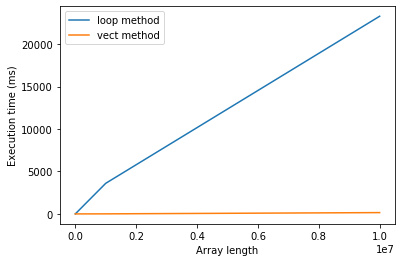

In [252]:
p.figure()
p.plot(array_lengths, t_loop, label="loop method")
p.plot(array_lengths, t_vect, label="vect method")
p.xlabel("Array length")
p.ylabel("Execution time (ms)")
p.legend()
p.show()

#### When to vectorize?

Thus vectorizing your code can have it running in a fraction of the time it otherwise would. Why not always vectorize then?

Generally, you should follow the same principles as with any code profiling: don't spend time speeding up code that isn't slow in the first place, or code which you will probably not need to run more than a small number of times.

#### "No free lunch!"

There are trade-offs to vectorizing, most notably memory usage. One downside of calculating many steps simultaneously is that your computer needs to hold much more in memory in order to do it. If you try to vectorize a problem thats *too* large, you will probably run into memory errors. One easy example is to re-run the above example, but make it **even bigger**:

```python
N = 1000000000

a = np.random.rand(N)
b = np.random.rand(N)
c = vect_product(a, b)

# if no error, remove a, b, c from memory.
del a
del b
del c
```

This will almost certainly return a memory error (i.e. your computer ran out of RAM in which to store the entirety of the very large arrays $a$, $b$ and $c$ while it was still calculating (if you didn't get an error, try again with an extra 0 in $N$).

Again, this is a rather contrived example - you probably won't be taking element-wise products of arrays with a billion entries in your research - but more complex problems can easily become too big for memory while still remaining biologically reasonable!

*Check out the CMEE module on High Performance Computing to learn about using Imperial College's supercomputing cluster to run extremely large problems*

```{tip}
You can use the `multiprocessing` package for parallelizing your code on your own computer. 
```

### Practicals

#### Lotka-Volterra model problem

Copy and modify `LV1.py` into another script called `LV2.py` that has the following features:

*  It takes arguments for the four LV model parameters $r$, $a$, $z$ ,$e$ from the command line:
```
LV2.py arg1 arg2 ... etc
```
*  It runs the Lotka-Volterra model with prey density dependence $r R \left(1 - \frac{R} {K}\right)$, which changes the coupled ODEs to,

\begin{align}
    \frac{dR}{dt} &= r R \left(1 - \frac{R} {K}\right) - a C R\\
    \frac{dC}{dt} &= - z C + e a C R
\end{align}

*  It saves the plot as `.pdf` in an appropriate location.
*  The chosen parameter values should show in the plot (e.g., $r = 1, a = .5 $, etc) You can change time length $t$ too.
* The parameters values should be adjusted such that both predator and prey persist with prey density dependence ( the final (non-zero) population values should be printed to screen).

Also, include a script that runs both `LV1.py` and `LV2.py` with appropriate arguments. This script should also profile the two scripts and print the results to screen for each of the scripts using the `%run -p` approach. Look at and compare the speed bottlenecks in `LV1.py` and `LV2.py`. *Think about how you could further speed up the scripts.*


#### Groupwork practical: Compare R and Python Vectorization

Implement the Python versions of `Vectorize1.R`and ` Vectorize2.R` [from the R Chapter](R-Vectorization) (call them `Vectorize1.py` and `Vectorize2.py` respectively). Then write a shell script that compares the computational speed of the four scripts. the script should display meaningful summary of the results in the terminal. In particular, it should print the timings of the equivalent R and Python functions (not just the timing of the R and Python scripts as a whole).

#### Groupwork practical: Discrete time LV Model

*Write every subsequent extra credit script file with a new name such as `LV3.py`,`LV4.py`, etc.* 

* Write a discrete-time version of the LV model called `LV3.py`. The discrete-time model is:

\begin{align} 
    R_{t+1} &= R_t (1 + r \left(1 - \frac{R_t}{K}\right) - a C_t)\\ 
    C_{t+1} &= C_t (1 - z + e a R_t) 
\end{align}

Include this script in `run_LV.py`, and profile it as well.

#### Groupwork practical: Discrete time LV model with stochasticity

* Write a version of the discrete-time model (which you implemented in `LV3.py`) simulation with a random gaussian fluctuation in resource's growth rate at each time-step:

\begin{align}
        R_{t+1} &= R_t (1 + (r + \epsilon) \left(1 - \frac{R_t}{K}\right)- a C_t)\\
        C_{t+1} &= C_t (1 - z + e a R_t)
\end{align}

where $\epsilon$ is a random fluctuation drawn from a gaussian distribution (use `sc.stats` or `np.random`). Include this script in ` run_LV.py`, and profile it as well. You can also add fluctuations to both populations simultaneously this way: 

\begin{align}
    R_{t+1} &= R_t (1 + (r + \epsilon)  \left(1 - \frac{R_t}{K}\right) - a C_t)\\
    C_{t+1} &= C_t (1 - (z + \epsilon) + e a R_t)
\end{align}

*As always, test, add, commit and push all your new code and data to your git repository.*

(Python_II:python-regex)=
## Regular expressions in Python

Let's shift gears now, and look at a very important tool set that you should learn, or at least be aware of — *Regular expressions*. 

Regular expressions (regex) are a tool to find patterns (not just a particular sequence of characters) in strings. For example, `your@email.com` is a specific sequence of characters, but, in fact, all email addresses have such a pattern: alphanumeric characters, a "@", alphanumeric characters, a ".", alphanumeric characters. Using regex, you can search for all email addresses in a text file by searching for this pattern.    

There are many uses of regex, such as:

* Parsing (reading) text files and finding and replacing or deleting specific patterns 
* Finding DNA motifs in sequence data
* Navigating through files in a directory
* Extracting information from html and xml files

Thus, if you are interested in data mining, need to clean or process data in any other way, or convert a bunch of information into usable data, knowing regex is absolutely necessary.


---

:::{figure-md} XKCD-on-Regex

<img src="./graphics/regex.png" alt="XKCD on Regex" width="400px">

**Regular expressions can really improve your quality of life.**<br> (Source: [XKCD](https://www.xkcd.com/208/)) 

:::

---



Regex packages are available for most programming languages (recall [`grep` in UNIX](Using-grep); that is how regex first became popular).

### Metacharacters vs. regular characters

A regex may consist of a combination of special "metacharacters" (modifiers) and "regular" or literal characters. There are 14 metacharacters: 

|Metacharacter|Description|
|:-|:-|
|`[` `]` |	Used to enclose a specific character "class" — the set of characters that you wish to match. For example,  `[12]` means match target to "1" and if that does not match then match target to "2"; `[0-9]` means match to any character in range "0" to "9"|
|`\`|	Inhibits the "specialness" of a (meta)character so that it can be interpreted literally. So, for example, use `\.` to match an actual period, and  `\\` to match an actual back slash. |
| `.` |	Match any character except line break (newline); e.g.,	`he..o` will match *hello* as well as *he12o*	|
|`^` |	Indicates that the string to be matched is at the start of a longer string; e.g., `^hello` will match "hello" in "hello fellow!", but not in "fellow, hello!" |
|`$` |	Match the end of a string; for example, `world$` will match "world" in "Hello world", but not in "Hello world!"  	|
|`*` |	Match zero or more occurrences of the character or pattern that precedes it.|
|`+` |	Match 1 or more occurrences of the character or pattern that precedes it.|
|`?`| Match the preceding pattern element zero *or* one times|
|`{` `}`| Match exactly the specified number of occurrences; e.g., `.{2}` finds the first two instances of any character (except newline)|
| `|`|	Match either or	|
|`(` `)`|	Capture and group; examples of this appear below |	 	 

Everything other than these metacharacters is interpreted literally (e.g., *a* is matched by entering `a` in the regex) &ndash; a regular character. 

```{note} 
**The difference between `*`, `+`, and `?`**: 
`*` matches zero or more times, so whatever's being repeated may *not* be present at all, while `+` *requires* at least one occurrence. So, for example, `ra+t` will match "rat" (one 'a' is present) and "raaat" (three "a"s), but won't match "rt". On the other hand, `?` matches a pattern either once or zero times, so it makes the pattern matching more flexible. For example, `home-?brew` matches either "homebrew" or "home-brew".
```

### Regex special sequences

Along with inhibiting the "specialness" of a metacharacter so that it can be interpreted literally (see examples in table above), the backslash (`\`) can be followed by various standard character types to denote various *special sequences*. 

Below is a list of *commonly encountered* special sequences in [Unicode](https://en.wikipedia.org/wiki/Unicode) string patterns. For a complete list look [here](https://docs.python.org/3/library/re.html#re-syntax).

|Sequence|Description|
|:-|:-|
|`\d`| Matches any numeric (integer); this is equivalent to the regex class [0-9]|
|`\D`| Matches any non-digit character not covered by ` \d` (i.e., match a non-digit); this is equivalent to the class [^0-9]|
|`\n`| Matches a newline|
|`\t`| Matches a tab space|
|`\s`|Matches any whitespace character; this is equivalent to the class [ \t\n\r\f\v]| 
|`\S`| Matches any non-whitespace character; this is equivalent to the class [^ \t\n\r\f\v]|
|`\w`| Matches any "alphanumeric" character (including underscore); this is equivalent to the class [a-zA-Z0-9_]|
|`\W`| Matches any non-alphanumeric character not covered by `\w`, i.e., any non-alphanumeric character excluding underscore, such as `?`, `!`, `+`, `<`, etc. ; this is equivalent to the class [^a-zA-Z0-9_]|

In the above table, 
* `\r` stands for a "[carriage-return](https://en.wikipedia.org/wiki/Carriage_return#Computers)", which is usually (but not always) the same as as a newline (`\n`);
* `\f` stands fior ["form feed"](https://en.wikipedia.org/wiki/Page_break) (or a page break character)
* `\v` stands for  ["vertical whitespace"](https://en.wikipedia.org/wiki/Whitespace_character), which includes all characters treated as line breaks in the Unicode standard.

These are rarely encountered, but can exist in certain text files.

```{note}
The reason why we have specified underscore as belonging to `\w` (i.e., the regex set [A-Za-z0-9_]) is because this is the specification of this class in Python regex in particular. This class definition is shared by most, but not all regex "flavors" (i.e., regex in other languages, such as Perl or Bash (recall `grep`)). The goal is to not to worry about it, but to keep in mind that `\w` will also match any pattern that includes one or more `_`'s!    
```

### Some regex examples

So combining metacharacters, regular characters and special sequences allows you to find pretty much any pattern. Here are some examples:

|Regex|Description|
|:-|:-|
|`aX9`| match the character string *aX9* exactly (case sensitively)| 
|`aX9\n`| match the character string *aX9*  (case sensitively) followed by a newline| 
|`8`| match the number *8*|
|`\d8`| match the number *8* preceded by any decimal number|
|`[atgc]` | match any character listed: `a`, `t`, `g`, `c`|
| `at|gc`  | match `at` or `gc`|
|`[^atgc]`| match any character not listed: any character except `a`, `t`, `g`, `c`|
| `[^a-z]` | match everything except lower case *a* to *z* |
| `[^Ff]`| match anything except upper or lower case *f* | 
|`\w{n}`| match the preceding pattern  element (any alphanumeric character) *exactly* `n` times|
|`\w{n,}`| match the preceding pattern element (any alphanumeric character) *at least* `n` times|
|`\w{n,m}`| match the preceding pattern element (any alphanumeric character) at least `n` but not more than `m` times|

```{tip}
Metacharacters are not active inside classes. For example, `[a-z$]` will match any of the characters `a` to `z`, but also `$`, because inside a character class it loses its special metacharacter status.
```

### Regex in Python

Regex functions in python are in the module `re`. 

Let's import it:

In [253]:
import re

The simplest `python` regex function is `re.search`, which searches the string for match to a given pattern — returns a *match object* if a match is found and `None` if not. Thus, the command `match = re.search(pat, str)` finds matches of the pattern `pat` in the given string `str` and stores the search result in a variable named `match`.

```{tip} 
**Always** put `r` in front of your regex — it tells python to read the regex in its "raw" (literal) form. Without raw string notation (`r"text"`), every backslash (`\`) in a regular expression would have to be prefixed with another one to escape it. Read more about this [here](https://docs.python.org/3.5/library/re.html).
```

OK, let's try some regexes (type all that follows in `regexs.py`):

In [254]:
my_string = "a given string"

Find a space in the string:

In [255]:
match = re.search(r'\s', my_string)
print(match)

<re.Match object; span=(1, 2), match=' '>


That's only telling you that a match was found (the object was created successfully). 

To see the match, use:

In [256]:
match.group()

' '

Now let's try another pattern:

In [257]:
match = re.search(r'\d', my_string)

In [258]:
print(match)

None


No surprise, because there are no numeric characters in our string!

To know whether a pattern was matched, we can use an `if`:

In [259]:
MyStr = 'an example'

match = re.search(r'\w*\s', MyStr) # what pattern is this?

if match:                      
    print('found a match:', match.group()) 
else:
    print('did not find a match')    

found a match: an 


Here are some more regexes (add all that follows to `regexs.py`):

In [260]:
match = re.search(r'2' , "it takes 2 to tango")
match.group()

'2'

In [261]:
match = re.search(r'\d' , "it takes 2 to tango")
match.group()

'2'

In [262]:
match = re.search(r'\d.*' , "it takes 2 to tango")
match.group()

'2 to tango'

In [263]:
match = re.search(r'\s\w{1,3}\s', 'once upon a time')
match.group()

' a '

In [264]:
match = re.search(r'\s\w*$', 'once upon a time')
match.group()

' time'

Let's switch to a more compact syntax by directly returning the matched group (by directly appending `.group()` to the result).

In [265]:
re.search(r'\w*\s\d.*\d', 'take 2 grams of H2O').group()

'take 2 grams of H2'

In [266]:
re.search(r'^\w*.*\s', 'once upon a time').group() # 'once upon a '

'once upon a '

 Note that *, `+`, and `{ }` are all "greedy":  They repeat the previous regex token as many times as possible. 

As a result, they may match more text than you want. To make it non-greedy and terminate at the first found instance of a pattern, use `?`:

In [267]:
re.search(r'^\w*.*?\s', 'once upon a time').group()

'once '

To further illustrate greediness in regexes, let's try matching an HTML tag:

In [268]:
re.search(r'<.+>', 'This is a <EM>first</EM> test').group()

'<EM>first</EM>'

But we wanted just `<EM>`!  

It's because `+` is greedy. Instead, we can make `+` "lazy":

In [269]:
re.search(r'<.+?>', 'This is a <EM>first</EM> test').group()

'<EM>'

OK, moving on from greed and laziness...

In [270]:
re.search(r'\d*\.?\d*','1432.75+60.22i').group()

'1432.75'

Note `\` before the `.`, to be able to find a literal `.` 

Otherwise, `re.search` will consider it to be a regex element (`.` means "match any character except newline").

A couple more examples:

In [271]:
re.search(r'[AGTC]+', 'the sequence ATTCGT').group()

'ATTCGT'

In [272]:
re.search(r'\s+[A-Z]\w+\s*\w+', "The bird-shit frog's name is Theloderma asper.").group()

' Theloderma asper'

---

:::{figure-md} Theloderma-asper

<img src="./graphics/thelodermaasper.JPG" alt="Bird-shit Frog" width="350px">

**In case you were wondering what *Theloderma asper*, the "bird-shit frog", looks like.** Samraat snapped this one in a North-East Indian rainforest ages ago. 

:::

---

How about looking for email addresses in a string? For example, let's try matching a string consisting of an academic's name, email address and research area or interest (no need to type this into any python file):

In [273]:
MyStr = 'Samraat Pawar, s.pawar@imperial.ac.uk, Systems biology and ecological theory'
match = re.search(r"[\w\s]+,\s[\w\.@]+,\s[\w\s]+",MyStr)
match.group()

'Samraat Pawar, s.pawar@imperial.ac.uk, Systems biology and ecological theory'

Note the use of `[ ]`'s: for example, `[\w\s]` ensures that any combination of word characters and spaces is found. 

Let's see if this regex works on a different pattern of email addresses: 

In [274]:
MyStr = 'Samraat Pawar, s-pawar@imperial.ac.uk, Systems biology and ecological theory'

In [275]:
match = re.search(r"[\w\s]+,\s[\w\.@]+,\s[\w\s]+",MyStr)
match.group()

AttributeError: 'NoneType' object has no attribute 'group'

Nope! So let's make the email address part of the regex more robust:

In [276]:
match = re.search(r"[\w\s]+,\s[\w\.-]+@[\w\.-]+,\s[\w\s]+",MyStr)
match.group()

'Samraat Pawar, s-pawar@imperial.ac.uk, Systems biology and ecological theory'

### Practicals: Some RegExercises

The following exercises are not for submission as part of your coursework, but we will discuss them in class on a subsequent day.

1. Try the regex we used above for finding names (`[\w\s]+`) for cases where the person's name has something unexpected, like a `?` or a `+`. Does it work? How can you make it more robust? 
* Translate the following regular expressions into regular English:
    * `r'^abc[ab]+\s\t\d'`
    * `r'^\d{1,2}\/\d{1,2}\/\d{4}$'`
    * `r'\s*[a-zA-Z,\s]+\s*'`
* Write a regex to match dates in format YYYYMMDD, making sure that:
    * Only seemingly valid dates match (i.e., year greater than 1900)
    * First digit in month is either 0 or 1
    * First digit in day $\leq 3$ 

### Grouping regex patterns 

You can group regex patterns into meaningful blocks using parentheses. Let's look again at the example of finding  email addresses.

In [277]:
MyStr = 'Samraat Pawar, s.pawar@imperial.ac.uk, Systems biology and ecological theory'
match = re.search(r"[\w\s]+,\s[\w\.-]+@[\w\.-]+,\s[\w\s]+",MyStr)
match.group()

'Samraat Pawar, s.pawar@imperial.ac.uk, Systems biology and ecological theory'

Without grouping the regex:

In [278]:
match.group(0)

'Samraat Pawar, s.pawar@imperial.ac.uk, Systems biology and ecological theory'

Now create groups using `( )`:

In [279]:
match = re.search(r"([\w\s]+),\s([\w\.-]+@[\w\.-]+),\s([\w\s&]+)",MyStr)
if match:
    print(match.group(0))
    print(match.group(1))
    print(match.group(2))
    print(match.group(3))

Samraat Pawar, s.pawar@imperial.ac.uk, Systems biology and ecological theory
Samraat Pawar
s.pawar@imperial.ac.uk
Systems biology and ecological theory


Nice! This is very handy for extracting specific patterns from text data. Note that we excluded the `,`'s and the `\s`'s from the grouping parentheses because we don't want them to be returned in the match group list. 

Have a look at `re4.py` in the TheMulQuaBio's code repository for more on parsing email addresses using regexes.

### Useful `re` commands

Here are some important functions in the `re` module:

|Command|What it does|
|:-|:-|
| `re.search(reg, text)`| Scans the string and finds the first match of the pattern, returning a `match` object if successful and `None` otherwise.|
| `re.match(reg, text)`| Like `re.search`, but only matches the beginning of the string.|
| `re.compile(reg)`| Compiles (stores) a regular expression for repeated use, improving efficiency.|
| `re.split(ref, text)`| Splits the text by the occurrence of the pattern described by the regular expression.|
| `re.findall(ref, text)`| Like `re.search`, but returns a list of all matches. If groups are present, returns a list of groups.|
| `re.finditer(ref, text)`| Like `re.findall`, but returns an iterator containing the match objects over which you can iterate. Useful for "crawling" efficiently through text till you find all necessary number of matches.|
| `re.sub(ref, repl, text)`|  Substitutes each non-overlapping occurrence of the match with the text in `repl`.|
|||

Many of these commands also work on whole contents of files. We will look at an example of this below. Let us try some particularly useful applications of some of these commands.

### Finding all matches

Above we used re.search() to find the first match for a pattern. In many scenarios, you will need to find *all* the matches of a pattern. The function `re.findall()` does precisely this and returns all matches as a list of strings, with each string representing one match.

Let's try this on an extension of the email example above for some data with multiple addresses: 

In [280]:
MyStr = "Samraat Pawar, s.pawar@imperial.ac.uk, Systems biology and ecological theory; Another academic, a-academic@imperial.ac.uk, Some other stuff thats equally boring; Yet another academic, y.a_academic@imperial.ac.uk, Some other stuff thats even more boring"

Now `re.findall()` returns a list of all the emails found:

In [281]:
emails = re.findall(r'[\w\.-]+@[\w\.-]+', MyStr) 
for email in emails:
    print(email)

s.pawar@imperial.ac.uk
a-academic@imperial.ac.uk
y.a_academic@imperial.ac.uk


Nice! 

### Finding in files

You will generally be wanting to apply regex searches to whole files. You might be tempted to write a loop to iterate over the lines of the file, calling `re.findall()` on each line. However, `re.findall()` can return a list of all the matches in a single step. 

Let's try finding all species names that correspond to Oaks in a data file:

In [282]:
f = open('../data/TestOaksData.csv', 'r')
found_oaks = re.findall(r"Q[\w\s].*\s", f.read())

found_oaks

['Quercus, robur\n', 'Quercus, cerris\n', 'Quercus, petraea\n']

This works because recall that `f.read()` returns the whole text of a file in a single string). Also, the file is closed after reading.

### Groups within multiple matches

Grouping pattern matches using `( )` as you learned above, can be combined with `re.findall()`. If the pattern includes *two or more* groups, then instead of returning a list of strings, `re.findall()` returns a list of tuples. Each tuple represents one match of the pattern, and inside the tuple is group(1), group(2), etc.

Let's try it:

In [283]:
MyStr = "Samraat Pawar, s.pawar@imperial.ac.uk, Systems biology and ecological theory; Another academic, a.academic@imperial.ac.uk, Some other stuff thats equally boring; Yet another academic, y.a.academic@imperial.ac.uk, Some other stuff thats even more boring"

found_matches = re.findall(r"([\w\s]+),\s([\w\.-]+@[\w\.-]+)", MyStr)
found_matches

[('Samraat Pawar', 's.pawar@imperial.ac.uk'),
 (' Another academic', 'a.academic@imperial.ac.uk'),
 (' Yet another academic', 'y.a.academic@imperial.ac.uk')]

In [284]:
for item in found_matches:
    print(item)

('Samraat Pawar', 's.pawar@imperial.ac.uk')
(' Another academic', 'a.academic@imperial.ac.uk')
(' Yet another academic', 'y.a.academic@imperial.ac.uk')


### Extracting text from webpages

OK, let's step up the ante here. How about extracting text from a web page to create your own data? Let's try extracting data from [this page](https://www.imperial.ac.uk/silwood-park/academic-staff/).

You will need a new package `urllib3`. Install it, and import it (also `import re` if needed). 

In [285]:
import urllib3

In [286]:
conn = urllib3.PoolManager() # open a connection
r = conn.request('GET', 'https://www.imperial.ac.uk/silwood-park/academic-staff/') 
webpage_html = r.data #read in the webpage's contents

This is returned as bytes (not strings). 

In [287]:
type(webpage_html)

bytes

So decode it (remember, the default decoding that this method applies is *utf-8*):

In [288]:
My_Data  = webpage_html.decode()
#print(My_Data)

That's a lot of potentially useful information! Let's extract all the names of academics:

In [289]:
pattern = r"Dr\s+\w+\s+\w+"
regex = re.compile(pattern) # example use of re.compile(); you can also ignore case  with re.IGNORECASE 
for match in regex.finditer(My_Data): # example use of re.finditer()
    print(match.group())

Dr Arkhat Abzhanov
Dr Arkhat Abzhanov
Dr Cristina Banks
Dr Martin Brazeau
Dr Martin Brazeau
Dr Lauren Cator
Dr Rob Ewers
Dr Rob Ewers
Dr Matteo Fumagalli
Dr Matteo Fumagalli
Dr Matteo Fumagalli
Dr Richard Gill
Dr Richard Gill
Dr Samraat Pawar
Dr Will Pearse
Dr Will Pearse
Dr Will Pearse
Dr Julia Schroeder
Dr Julia Schroeder
Dr Julia Schroeder
Dr Joseph Tobias
Dr Joseph Tobias
Dr Mike Tristem
Dr Mike Tristem
Dr Bonnie Waring
Dr Bonnie Waring
Dr Bonnie Waring
Dr Emma Cavan
Dr Emma Cavan
Dr Emma Caven
Dr Magda Charalambous
Dr Magda Charalambous
Dr Vassiliki Koufopanou
Dr David Orme
Dr James Rosindell
Dr Chris Wilson
Dr Oliver Windram
Dr Peter Graystock
Dr Peter Graystock
Dr Michael Themis
Dr Michael Themis
Dr Aurelio Malo
Dr Aurelio Malo


Again, nice! However, its' not perfect. 

You can improve this by:
* Extracting Prof names as well
* Eliminating the repeated matches
* Grouping to separate title from first and second names
* Extracting names that have unexpected characters, such as in hyphenated names (a "-" in the name)

*Try making these improvements.*

Of course, you can match and extract other types of patterns as well, such as urls and email addresses (though this example web page does not have email addresses).

### Replacing text

Using the same web page data, let's try using the `re.sub` command on the same web page data (`My_Data`) to replace text:

In [160]:
New_Data = re.sub(r'\t'," ", My_Data) # replace all tabs with a space
# print(New_Data)

### Practicals

#### Blackbirds problem

Complete the code `blackbirds.py` that you find in the `TheMulQuaBio` (necessary data file is also there).

## Using Python to build workflows

You can use python to build an automated data analysis or simulation workflow that involves multiple languages, especially the ones you have already learnt: R, $\LaTeX$, and UNIX bash. For example, you could, in theory, write a single Python script to generate and update your masters dissertation, tables, plots, and all. Python is ideal for building such workflows because it has packages for practically every purpose.

*Thus this topic may be useful for your [Miniproject](Appendix-MiniProj.ipynb), which will involve building a reproducible computational workflow.*

### Using `subprocess`

For building a workflow in Python the `subprocess` module is key. With this module you can run non-Python commands and scripts, obtain their outputs, and also crawl through and manipulate directories. 

First, import the module (this is part of the python standard library, so you won't need to install it):

In [1]:
import subprocess

#### Running processes

There are two main ways to run commands through subprocess: `run` (available in Python 3.5 onwards) for basic usage, and `Popen` (`P`rocess `open`) for more advanced usage. We will work directly with `popen` because `run()` is a wrapper around `Popen`. Using `Popen` directly gives more control over how the command is run, and how its input and output are processed. 

Let's try running some commands in the UNIX bash. 

$\star$ In a terminal, first `cd` to your `code` directory,  launch `ipython3`, then and type:

In [2]:
p = subprocess.Popen(["echo", "I'm talkin' to you, bash!"], stdout=subprocess.PIPE, stderr=subprocess.PIPE)

This creates an object `p`, from which you can extract the output and other information of the command you ran. Before we do anything more, let's look at our `subprocess.popen` call carefully. 

* The command line arguments were passed as a list of strings, which avoids the need for escaping quotes or other special characters that might be interpreted by the shell (for example, in this case, there are apostrophes in the string that is being `echo`ed in bash).
* `stdout` is the output from the process "spawned" by your command. This is a sequence of bytes (which you will need to decode - more on this below). 
* `stderr` is the error code (from which you can capture whether the process ran successfully or not). The method PIPE creates a new "pipe" (literally, a connection) to the output of to the "child"  process.

In [3]:
stdout, stderr = p.communicate()

In [4]:
stderr

b''

Nothing here, because the echo command does no return an any code. the `b` indicates that the output is in bits (unencoded). By default, stdout, stderr (and other outputs of `p.communicate`) are returned as binary (byte) format.

Now check what's in `stdout`:

In [5]:
stdout

b"I'm talkin' to you, bash!\n"

Let's encode and print it.

In [6]:
print(stdout.decode())

I'm talkin' to you, bash!



You can also use a `universal_newlines = True` so that these outputs are returned as encoded text (default being *utf-8* usually), with  line endings converted to '\n'. For more information [see the documentation](https://docs.python.org/3.5/library/subprocess.html).

Let's try something else: 

In [7]:
p = subprocess.Popen(["ls", "-l"], stdout=subprocess.PIPE)
stdout, stderr = p.communicate()

Now use `print(stdout.decode())` to see the output.

Recall that the `ls -l` command lists all files in a long listing format. 

You can also call python itself from bash (!):

```python
p = subprocess.Popen(["python3", "boilerplate.py"], stdout=subprocess.PIPE, stderr=subprocess.PIPE) # A bit silly! 
stdout, stderr = p.communicate()

print(stdout.decode())
```

This should give you the output of your `boilerplate.py` script (remember, your current path will need to be in the appropriate code directory of the relevant week's directory). 

Similarly, to compile a $\LaTeX$ document (using `pdflatex` in this case), you can do something like:

```python
subprocess.os.system("pdflatex yourlatexdoc.tex")
```

### Handling directory and file paths

You can also use `subprocess.os` to make your code OS (Linux, Windows, Mac) independent. For example to assign paths:

In [9]:
subprocess.os.path.join('directory', 'subdirectory', 'file')

'directory/subdirectory/file'

The result would be appropriately different on Windows (with backslashes instead of forward slashes).

Note that in all cases you can "catch" the output of `subprocess` so that you can then use the output within your
python script. A simple example, where the output is a platform-dependent directory path, is:

In [10]:
MyPath = subprocess.os.path.join('directory', 'subdirectory', 'file')
MyPath

'directory/subdirectory/file'

Explore what `subprocess` can do by tabbing
`subprocess.`, and also for submodules, e.g., type
`subprocess.os.` and then tab.

### Running `R`

R is likely an important part of your project's analysis and data visualization components in particular — for example for statistical analyses and pretty plotting (`ggplot2`!).

You can run `R` from Python easily. Try the following:

$\star$ Create an R script file called `TestR.R` in your `code` directory with the following content:

```r
print("Hello, this is R!")
```

Now, create a script `TestR.py` with the following content :

In [11]:
import subprocess
subprocess.Popen("Rscript --verbose TestR.R > ../Results/TestR.Rout 2> ../Results/TestR_errFile.Rout", shell=True).wait()

2


Now run `TestR.py` (or `%cpaste`) and check`TestR.Rout` and `TestR_errorFile.Rout`.

Also check what happens if you run (type directly in `ipython` or `python` console):

In [12]:
subprocess.Popen("Rscript --verbose NonExistScript.R > ../Results/outputFile.Rout 2> ../Results/errorFile.Rout", shell=True).wait()

2

What do you see on the screen? 

Now open and check `outputFile.Rout`and `errorFile.Rout.

```{tip}
It is possible that the location of `RScript` is different in your Unix/Linux system. To locate it, try `find /usr -name 'Rscript'` in the bash terminal (not in Python!). For example, you might need to specify the path to it using `/usr/lib/R/bin/Rscript`.
```

### Practicals


As always, test, add, commit and push all your new code and data to your git repository.

#### Using `os` problem 1

Open `using_os.py` and complete the tasks assigned (hint: you might want to look at `subprocess.os.walk()`)

#### Using `os` problem 2

Open `fmr.R` and work out what it does; check that you have `NagyEtAl1999.csv`. Now write python code called
`run_fmr_R.py` that:

Runs `fmr.R` to generate the desired result

`run_fmr_R.py` should also print to the python screen whether the run was successful, and the contents of the R console output

* `git add`, `commit` and `push` all your week's code by the given deadline.

## Networks in Python

ALL biological systems have a network representation, consisting of nodes for the biological entities of interest, and edges or links for the relationships between them. Here are some examples:
* Metabolic networks
* Gene regulatory networks
* Individual-Individual (e.g., social networks)
* Who-eats-whom (Food web) networks
* Mutualistic (e.g., plant-pollinator) networks

*Can you think of a few more examples from biology?*

You can easily simulate, analyze, and visualize biological networks in both `python` and `R` using some nifty packages. A full network analysis tutorial is out of the scope of our Python module's objectives, but let's try a simple visualization using the ` networkx` python package.

For this you need to first install the package, for example, by using:

```bash
sudo apt-get install python3-networkx
```

### Food web network example

As an example, let's plot a food web network. 

The best way to store a food web dataset is as an "adjacency list" of who eats whom: a matrix with consumer name/id in 1st column, and resource name/id in 2nd column, and a separate matrix of species names/ids and properties such as biomass (node's abundance), or average body mass. You will see what these data structures look like below. 

First, import the necessary modules:

In [154]:
import networkx as nx
import scipy as sc
import matplotlib.pylab as p

Let's generate a "synthetic" food web. We can do this with the following function that generates a random adjacency list of a $N$-species food web with "connectance probability" $C$: the probability of having a link between any pair of species in the food web. 

In [117]:
def GenRdmAdjList(N = 2, C = 0.5):
    """ 
    """
    Ids = range(N)
    ALst = []
    for i in Ids:
        if np.random.uniform(0,1,1) < C:
            Lnk = np.random.choice(Ids,2).tolist()
            if Lnk[0] != Lnk[1]: #avoid self (e.g., cannibalistic) loops
                ALst.append(Lnk)
    return ALst

Note that we are using a uniform random distribution between `[0,1]` to generate a connectance probability between each species pair. 

Now assign number of species (`MaxN`) and connectance (`C`):

In [118]:
MaxN = 30
C = 0.75

Now generate an adjacency list representing a random food web:

In [119]:
AdjL = np.array(GenRdmAdjList(MaxN, C))
AdjL

array([[ 7, 10],
       [29,  8],
       [29,  6],
       [27, 25],
       [ 1, 29],
       [ 3, 11],
       [16, 12],
       [17, 24],
       [ 8, 26],
       [24,  5],
       [11, 14],
       [ 1, 19],
       [28, 16],
       [ 3,  8],
       [16,  0],
       [ 5, 24],
       [22, 21],
       [ 8, 26],
       [13, 19],
       [ 0, 23]])

So that's what an adjacency list looks like. The two columns of numbers correspond to the consumer and resource ids, respectively.  

Now generate species (node) data:

In [120]:
Sps = np.unique(AdjL) # get species ids

Now generate body sizes for the species. We will use a log$_{10}$ scale because species body sizes tend to be [log-normally distributed](08-Data_R.ipynb#Histograms).

In [121]:
SizRan = ([-10,10]) #use log10 scale
Sizs = np.random.uniform(SizRan[0],SizRan[1],MaxN)
Sizs

array([-7.24580335, -6.34223605, -3.06433327, -4.14101734, -0.42383356,
        6.48230003, -7.46288577, -0.09210636, -0.30824046,  5.05976788,
        3.63763222, -8.47367241, -6.83922822,  3.79449561,  7.96727478,
        9.79412592, -9.78750357,  6.72700644,  4.14249903, -9.77200529,
       -5.89392611,  1.34223541,  6.41108343,  0.30499043,  5.6731972 ,
       -7.21906563, -6.02855067,  3.87331691,  9.14260337,  7.08389363])

Let's visualize the size distribution we have generated.

(array([3., 7., 1., 1., 3., 2., 3., 3., 4., 3.]),
 array([-9.78750357e+00, -7.82934062e+00, -5.87117767e+00, -3.91301472e+00,
        -1.95485177e+00,  3.31117768e-03,  1.96147413e+00,  3.91963707e+00,
         5.87780002e+00,  7.83596297e+00,  9.79412592e+00]),
 <a list of 10 Patch objects>)

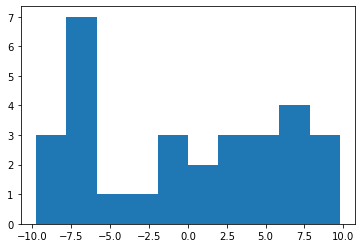

In [122]:
p.hist(Sizs) #log10 scale

(array([28.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([1.63115952e-10, 6.22480743e+08, 1.24496149e+09, 1.86744223e+09,
        2.48992297e+09, 3.11240371e+09, 3.73488446e+09, 4.35736520e+09,
        4.97984594e+09, 5.60232669e+09, 6.22480743e+09]),
 <a list of 10 Patch objects>)

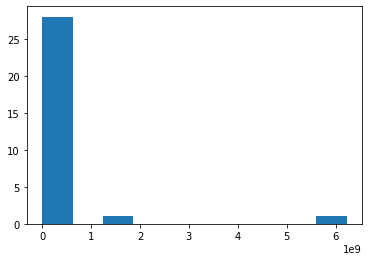

In [123]:
p.hist(10 ** Sizs) #raw scale

Now let's plot the network, with node sizes proportional to (log) body size:

In [124]:
p.close('all') # close all open plot objects

Let's use a circular configuration. For this, we need to calculate the coordinates, easily done using networkx:

In [125]:
pos = nx.circular_layout(Sps)

See `networkx.layout` for inbuilt functions to compute other types of node coordinates.

Now generate a networkx graph object:

In [126]:
G = nx.Graph()

Now add the nodes and links (edges) to it:

In [127]:
G.add_nodes_from(Sps)
G.add_edges_from(tuple(AdjL))

Note that the function `add_edges_from` needs the adjacency list as a tuple.

Now generate node sizes that are proportional to (log) body sizes:

In [128]:
NodSizs= 1000 * (Sizs-min(Sizs))/(max(Sizs)-min(Sizs)) 

Now render (plot) the graph:

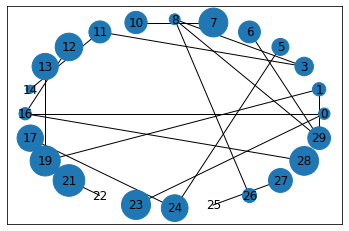

In [129]:
nx.draw_networkx(G, pos, node_size = NodSizs)

You might get a warning. In that case, try upgrading the networkx package.   

### Practicals

#### Plot the foodweb

Type the above code for plotting a food web network in a program file called `DrawFW.py`. This file should save the plotted network as a pdf.   

#### Groupwork: networks in R 

You can also do nice network visualizations in R. Here you will convert a network visualization script written in `R` using the `igraph` package to a python script that does the same thing.

* First copy the script file called `Nets.R` and the data files it calls and run it. This script visualizes the [QMEE CDT collaboration network](http://www.imperial.ac.uk/qmee-cdt), coloring the the nodes by the type of node (organization type: "University","Hosting Partner", "Non-hosting Partner").

* Now, convert this script to a Python script that does the same thing, including writing to a `.svg` file using the same QMEE CDT link and node data. You can use `networkx` or some other python network visualization package.

## Readings and Resources

### Scientific computing

* In general, scores of good module/package-specific cookbooks are out there — google "cookbook" along with the name of the package you are interested in (e.g., "scipy cookbook").

* For SciPy, read the [official documentation](https://docs.scipy.org/doc/); in particular, read about the scipy [modules](https://docs.scipy.org/doc/scipy/reference/) you think will be important to you.

* The "ecosystem" for Scientific computing in python: <http://www.scipy-lectures.org/>

* Many great examples of applications in the [scipy cookbook](https://scipy-cookbook.readthedocs.io/)

* Scipy stats: https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html

* A Primer on Scientific Programming with Python <http://www.springer.com/us/book/9783642549595>; Multiple copies of this book are available from the central library and can be requested to Silwood from the IC library website. You can also find a pdf - seach online.

### Regular expressions

* Python regex documentation: https://docs.python.org/3.6/howto/regex.html

* Google's short class on regex in python: https://developers.google.com/edu/python/regular-expressions
And this exercise: https://developers.google.com/edu/python/exercises/baby-names

* Good intro to regex, tips and a great array of canned solutions: http://www.regular-expressions.info

* Use and abuse of regex: <https://blog.codinghorror.com/regex-use-vs-regex-abuse/>

### Other stuff

* [The matplotlib website](http://matplotlib.org)

* Alternatives to matplotlib for plotting in python: https://towardsdatascience.com/matplotlib-vs-seaborn-vs-plotly-f2b79f5bddb

* Some of you might find the python package `biopython` particularly useful — check out <http://biopython.org/>, and especially, the cookbook